In [1]:
#CORRELARE GLI STORICI COL PERIODO CHE HANNO STUDIATO

import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()


# parse a local RDF file by specifying the format
result = g.parse("resources/artchives.nq", format='nquads')


    
query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX art: <https://w3id.org/artchives/>
    SELECT DISTINCT ?Historian ?Period
    WHERE {
        ?collect wdt:P170 ?artHistorian ;
                    rdfs:label ?Collection ;
                    art:hasSubjectPeriod ?perio .
        ?perio rdfs:label ?Period .
        ?artHistorian rdfs:label ?Historian . 
    }
    GROUP BY ?Historian ?Period
    """)

with open('historian_periods.csv', 'wt') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',' , quoting=csv.QUOTE_ALL)
    csv_writer.writerow(['Historian', 'Period'])
    for row in query_result:
        csv_writer.writerow([row.Historian.strip(), row.Period.lower().strip()]) #se metto row.name mi da i nomi dei paesi, ma non leva i doppioni
        
import pandas as pd
data = pd.read_csv('historian_periods.csv', encoding = 'latin-1', error_bad_lines=False)
# print the first 5 rows
data.head(30)


,Historian,Period
0,Ernst Steinmann,renaissance
1,Ernst Steinmann,renaissance
2,Ernst Steinmann,renaissance
3,Ernst Steinmann,renaissance
4,Ernst Steinmann,renaissance
5,Ernst Steinmann,renaissance
6,Ernst Steinmann,renaissance
7,Ernst Steinmann,renaissance
8,Ernst Steinmann,renaissance
9,Ernst Steinmann,renaissance


In [2]:
import pandas as pd
file_name = "historian_periods.csv"
file_name_output = "historian_periods_without_dupes.csv"

df = pd.read_csv(file_name, sep=",", engine = "python", encoding = 'latin-1')
df.columns = df.columns.str.replace(' ', '')


# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=",", encoding="utf8")

In [4]:
df = pd.read_csv("historian_periods_without_dupes.csv", delimiter=',', encoding = "latin-1")
df.columns = df.columns.str.replace(' ', '')
    #prova con writerow, o creare dataFrame con pandasdata.drop_duplicates('nameKeeper', keep= 'last'))
df.drop_duplicates('Historian', keep= 'last')
df.drop_duplicates('Period', keep= 'last')

#df.head(30)
#df =df.set_index("Birthplace")
#df = df.drop("Forl�", axis=0)
#df = df.drop([13], axis=0)
df.head(40)

,Historian,Period
0,Ernst Steinmann,renaissance
1,Julian Kliemann,15th century
2,Julian Kliemann,baroque
3,Julian Kliemann,16th century
4,Julian Kliemann,mannerism
5,Julian Kliemann,17th century
6,Julian Kliemann,renaissance
7,Wolfgang Lotz,16th century
8,Wolfgang Lotz,17th century
9,Wolfgang Lotz,renaissance


In [6]:
import pandas_profiling as pp
pp.ProfileReport(df.drop_duplicates('Historian', keep= 'last'))
pp.ProfileReport(df.drop_duplicates('Period', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


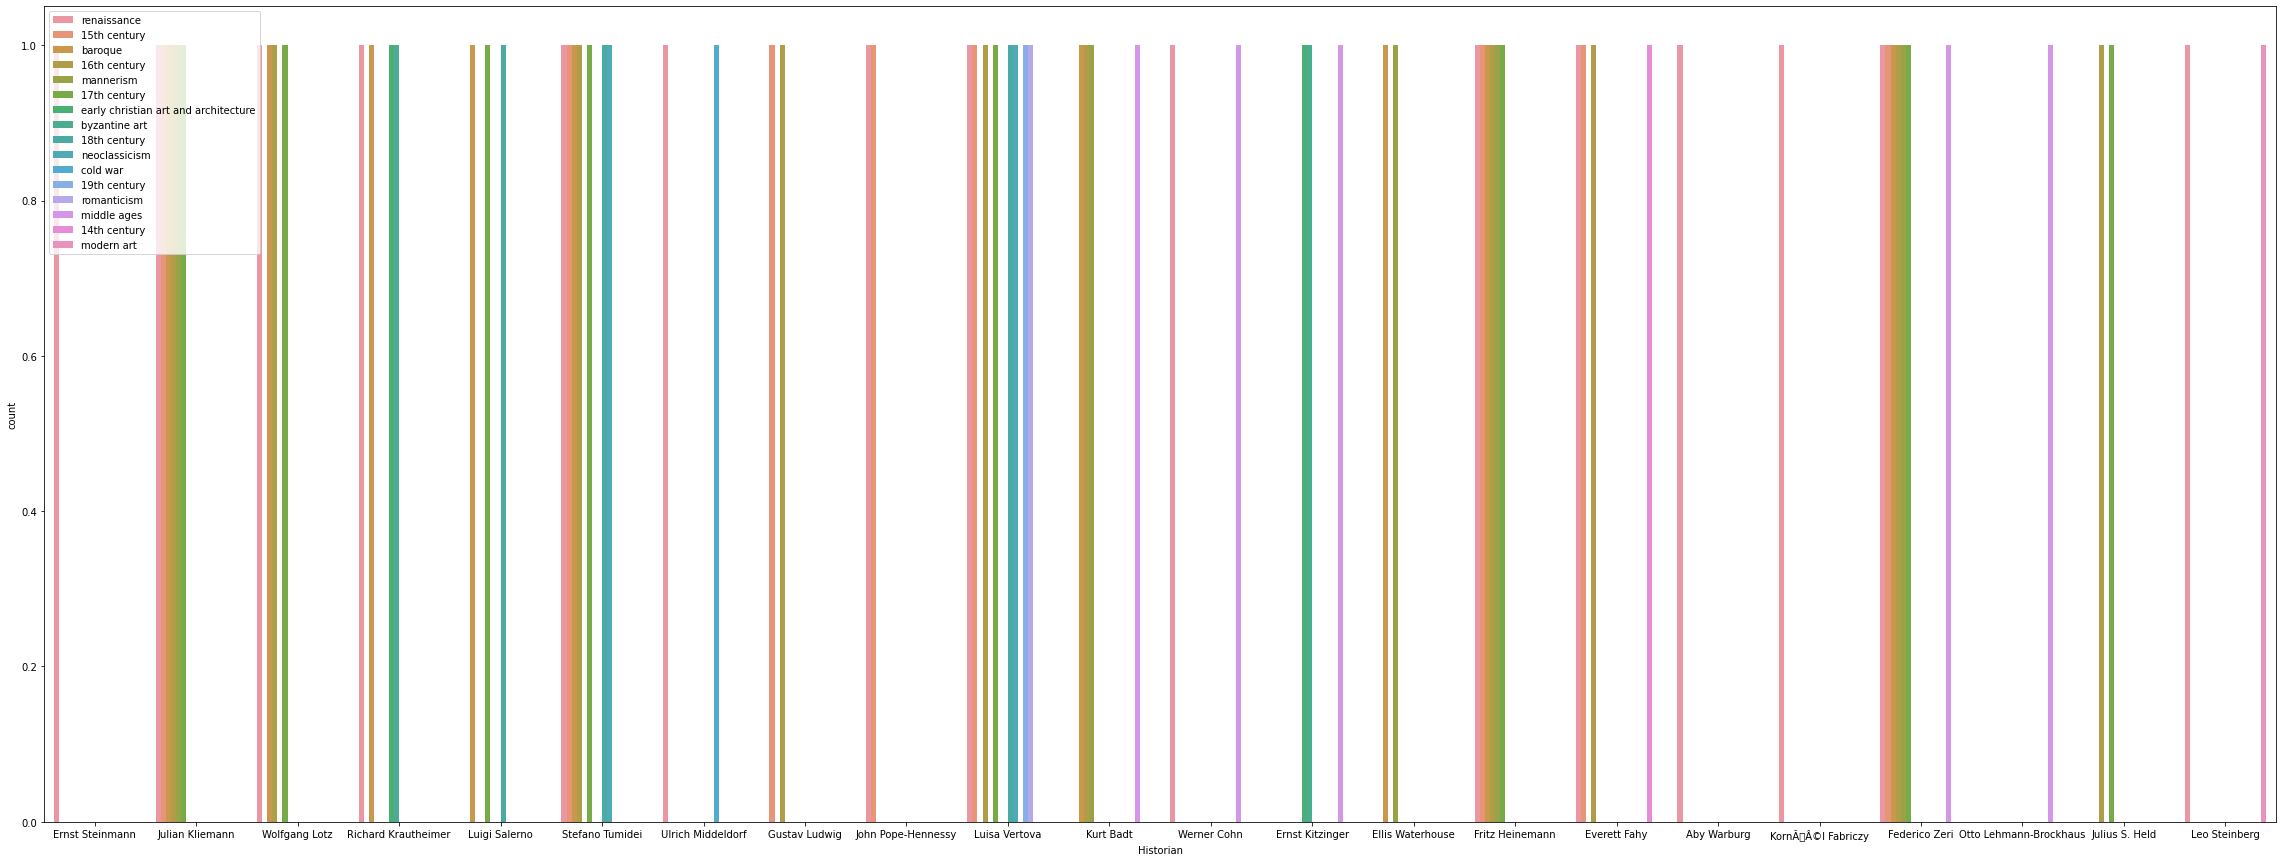

In [7]:
#PERIODS STUDIED BY EACH HISTORIAN
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (40, 15)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="Historian", hue="Period", data=df)
plt.legend(loc='upper left')


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


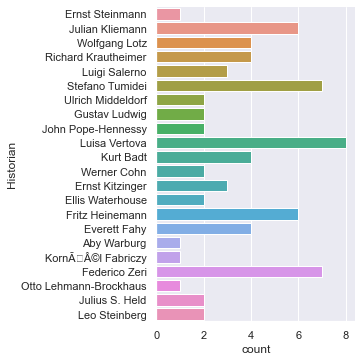

In [8]:
#plot the COUNT OF PERIODS STUDIED BY EACH HISTORIAN
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
ax = sns.catplot(y="Historian", kind= "count", data= df)

In [16]:
from math import pi

import pandas as pd

from bokeh.io import output_file, show, curdoc
#from bokeh.palettes import 
from bokeh.plotting import figure
from bokeh.transform import cumsum
import random

output_file("pie.html")
curdoc().theme = 'dark_minimal'

x ={
     'Ernst Kitzinger':3,
     'Gustav Ludwig':2,
     'Kornél Fabriczy':4,
     'Richard Krautheimer':4, 
     'Ellis Waterhouse':2, 
     'Everett Fahy':4, 
     'Kurt Badt':4, 
     'Luisa Vertova':8, 
     'Luigi Salerno':3, 
     'Julius S. Held':2, 
     'John Pope-Hennessy':2, 
     'Julian Kliemann':6, 
     'Aby Warburg':1, 
     'Werner Cohn':2, 
     'Leo Steinberg':2, 
     'Ernst Steinmann':1, 
     'Stefano Tumidei':7, 
     'Ulrich Middeldorf':2, 
     'Fritz Heinemann':6, 
     'Wolfgang Lotz':4, 
     'Otto Lehmann-Brockhaus':1, 
     'Federico Zeri':7,
     'KornÃ©l Fabriczy':1
 }


data = pd.Series(x).reset_index(name='value').rename(columns={'index':'Historians'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
number_of_colors = 23 # pick random colors for the countries
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
data['color'] = palette

p = figure(plot_height=700, title="Number of collections per historians", toolbar_location=None,
           tools="hover", tooltips="@Historians: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='Historians', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

In [14]:
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
with open('historian_periods_without_dupes.csv') as csvfile:
    historians = [] 
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[0] not in historians:
            historians.append(row[0]) # create the list of unique historians
       
    print(historians)
    periods_zeros_matrix = np.array(np.zeros((len(historians) ))) # rows, columns
    
    for i, histo in enumerate(historians): # loop over historians and their index position  
            with open('historian_periods_without_dupes.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[0] == histo:  
                        periods_zeros_matrix[i] = int(periods_zeros_matrix[i])+1
    
    periods_zeros_matrix
    

print(periods_zeros_matrix)

['Ernst Steinmann', 'Julian Kliemann', 'Wolfgang Lotz', 'Richard Krautheimer', 'Luigi Salerno', 'Stefano Tumidei', 'Ulrich Middeldorf', 'Gustav Ludwig', 'John Pope-Hennessy', 'Luisa Vertova', 'Kurt Badt', 'Werner Cohn', 'Ernst Kitzinger', 'Ellis Waterhouse', 'Fritz Heinemann', 'Everett Fahy', 'Aby Warburg', 'KornÃ©l Fabriczy', 'Federico Zeri', 'Otto Lehmann-Brockhaus', 'Julius S. Held', 'Leo Steinberg']
[1. 6. 4. 4. 3. 7. 2. 2. 2. 8. 4. 2. 3. 2. 6. 4. 1. 1. 7. 1. 2. 2.]


In [17]:
#SERVE LA MATRICE E LA VIZ BOKEH
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
with open('historian_periods_without_dupes.csv') as csvfile:
    historians = [] 
    periods = []
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[0] not in historians:
            historians.append(row[0]) # create the list of unique periods
        if row[1] not in periods:
            periods.append(row[1]) # create the list of unique periods
    print(historians)
    print(periods)
    periods.sort()
    periods_zeros_matrix = np.array(np.zeros(( len(periods), len(historians) ))) # rows, columns
    
    for i, histo in enumerate(historians): # loop over periods and their index position  
        for j, period in enumerate(periods):
            with open('historian_periods_without_dupes.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[1] == period and row[0] == histo:  
                        periods_zeros_matrix[j][i] = int(periods_zeros_matrix[j][i])+1
    
    periods_zeros_matrix
    
# put everything together
data["Historians"] = historians
for i, period in enumerate(periods):
    data[period] = list(periods_zeros_matrix[i])
print(data)

['Ernst Steinmann', 'Julian Kliemann', 'Wolfgang Lotz', 'Richard Krautheimer', 'Luigi Salerno', 'Stefano Tumidei', 'Ulrich Middeldorf', 'Gustav Ludwig', 'John Pope-Hennessy', 'Luisa Vertova', 'Kurt Badt', 'Werner Cohn', 'Ernst Kitzinger', 'Ellis Waterhouse', 'Fritz Heinemann', 'Everett Fahy', 'Aby Warburg', 'KornÃ©l Fabriczy', 'Federico Zeri', 'Otto Lehmann-Brockhaus', 'Julius S. Held', 'Leo Steinberg']
['renaissance', '15th century', 'baroque', '16th century', 'mannerism', '17th century', 'early christian art and architecture', 'byzantine art', '18th century', 'neoclassicism', 'cold war', '19th century', 'romanticism', 'middle ages', '14th century', 'modern art']
{'Historians': ['Ernst Steinmann', 'Julian Kliemann', 'Wolfgang Lotz', 'Richard Krautheimer', 'Luigi Salerno', 'Stefano Tumidei', 'Ulrich Middeldorf', 'Gustav Ludwig', 'John Pope-Hennessy', 'Luisa Vertova', 'Kurt Badt', 'Werner Cohn', 'Ernst Kitzinger', 'Ellis Waterhouse', 'Fritz Heinemann', 'Everett Fahy', 'Aby Warburg', 'Ko

In [22]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.layouts import row
import random

output_file("bar_nested_colormapped_period_histo.html")

historians = ['Gustav Ludwig', 'Fritz Heinemann', 'Werner Cohn', 'Ulrich Middeldorf', 'Ernst Steinmann', 'Leo Steinberg', 'Wolfgang Lotz', 'Otto Lehmann-Brockhaus', 'Kurt Badt', 'Julius S. Held', 'Aby Warburg', 'Ellis Waterhouse', 'Stefano Tumidei', 'John Pope-Hennessy', 'Kornél Fabriczy', 'Richard Krautheimer', 'Ernst Kitzinger', 'Julian Kliemann', 'Federico Zeri', 'Everett Fahy', 'Luigi Salerno', 'Luisa Vertova']
periods = ['byzantine art', 'middle ages', 'early christian art and architecture', '17th century', '16th century', 'baroque', 'renaissance', 'mannerism', '15th century', 'romanticism', '19th century', '18th century', 'neoclassicism', 'cold war', 'modern art', '14th century']
data = {'Historians': ['Ernst Steinmann', 'Julian Kliemann', 'Wolfgang Lotz', 'Richard Krautheimer', 'Luigi Salerno', 'Stefano Tumidei', 'Ulrich Middeldorf', 'Gustav Ludwig', 'John Pope-Hennessy', 'Luisa Vertova', 'Kurt Badt', 'Werner Cohn', 'Ernst Kitzinger', 'Ellis Waterhouse', 'Fritz Heinemann', 'Everett Fahy', 'Aby Warburg', 'KornÃ©l Fabriczy', 'Federico Zeri', 'Otto Lehmann-Brockhaus', 'Julius S. Held', 'Leo Steinberg'], '14th century': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '15th century': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], '16th century': [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], '17th century': [0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], '18th century': [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '19th century': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'baroque': [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'byzantine art': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'cold war': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'early christian art and architecture': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'mannerism': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'middle ages': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0], 'modern art': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 'neoclassicism': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'renaissance': [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0], 'romanticism': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

number_of_colors = 18 # pick random colors
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

x = [ (historian, period) for historian in historians for period in periods ]
counts = sum(zip(data['byzantine art'], data['middle ages'], data['early christian art and architecture'], data['17th century'], data['16th century'], data['baroque'], data['renaissance'], data['mannerism'], data['15th century'], data['romanticism'], data['19th century'], data['18th century'], data['neoclassicism'], data['cold war'], data['modern art'], data['14th century']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=650, width=4000, title="Period Counts by Historian",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=periods, start=1, end=2))


p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1.55
p.xgrid.grid_line_color = None
#p.xgrid=

show(row(p))



In [70]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import GnBu3, OrRd3
from bokeh.plotting import figure

output_file("bar_stacked_split.html")

historians = ['Gustav Ludwig', 'Fritz Heinemann', 'Werner Cohn', 'Ulrich Middeldorf', 'Ernst Steinmann', 'Leo Steinberg', 'Wolfgang Lotz', 'Otto Lehmann-Brockhaus', 'Kurt Badt', 'Julius S. Held', 'Aby Warburg', 'Ellis Waterhouse', 'Stefano Tumidei', 'John Pope-Hennessy', 'Kornél Fabriczy', 'Richard Krautheimer', 'Ernst Kitzinger', 'Julian Kliemann', 'Federico Zeri', 'Everett Fahy', 'Luigi Salerno', 'Luisa Vertova']
periods = ['byzantine art', 'middle ages', 'early christian art and architecture', '17th century', '16th century', 'baroque', 'renaissance', 'mannerism', '15th century', 'romanticism', '19th century', '18th century', 'neoclassicism', 'cold war', 'modern art', '14th century']

data = {'Historians': ['Ernst Kitzinger', 'Wolfgang Lotz', 'Federico Zeri', 'Otto Lehmann-Brockhaus', 'Luisa Vertova', 'Kurt Badt', 'Julius S. Held', 'Ulrich Middeldorf', 'Aby Warburg', 'Werner Cohn', 'Fritz Heinemann', 'Stefano Tumidei', 'Leo Steinberg', 'Kornél Fabriczy', 'Gustav Ludwig', 'Luigi Salerno', 'Everett Fahy', 'Richard Krautheimer', 'Julian Kliemann', 'Ellis Waterhouse', 'Ernst Steinmann', 'John Pope-Hennessy'], '14th century': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0], '15th century': [0.0, 0.0, 28.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 7.0, 0.0, 0.0, 7.0, 0.0, 14.0, 0.0, 7.0, 0.0, 0.0, 21.0], '16th century': [0.0, 18.0, 36.0, 0.0, 9.0, 9.0, 18.0, 0.0, 0.0, 0.0, 9.0, 9.0, 0.0, 0.0, 9.0, 0.0, 18.0, 0.0, 9.0, 0.0, 0.0, 0.0], '17th century': [0.0, 14.0, 28.0, 0.0, 7.0, 0.0, 14.0, 0.0, 0.0, 0.0, 7.0, 7.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0], '18th century': [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '19th century': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'baroque': [0.0, 22.0, 44.0, 0.0, 0.0, 11.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 11.0, 0.0, 33.0, 11.0, 11.0, 0.0, 0.0], 'byzantine art': [12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0], 'cold war': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'early christian art and architecture': [6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0], 'mannerism': [0.0, 0.0, 24.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 6.0, 0.0, 0.0], 'middle ages': [18.0, 0.0, 24.0, 18.0, 0.0, 6.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'modern art': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'neoclassicism': [0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'renaissance': [0.0, 22.0, 44.0, 0.0, 11.0, 0.0, 0.0, 22.0, 11.0, 11.0, 11.0, 11.0, 22.0, 11.0, 0.0, 0.0, 22.0, 33.0, 11.0, 0.0, 33.0, 33.0], 'romanticism': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

number_of_colors = 16 # pick random colors
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

p = figure(y_range=historians, plot_width=850, plot_height=750, x_range=(-18, 18), title="periods treated in historian collections",
           toolbar_location=None, tools="hover", tooltips="$name: @$name")

p.hbar_stack(periods, y='Historians', width=0, height=0.9, color=palette, source=ColumnDataSource(data),
             legend_label=["%s data" % x for x in periods])

#p.hbar_stack(periods, y='historians', height=0.9, color=OrRd3, source=ColumnDataSource(imports),
 #            legend_label=["%s imports" % x for x in years])

p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.location = "top_left"
p.axis.minor_tick_line_color = None
p.outline_line_color = None

show(p)

In [23]:
#CORRELARE LE COLLEZIONI AI KEEPER

import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()


# parse a local RDF file by specifying the format
result = g.parse("resources/artchives.nq", format='nquads')


    
query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX art: <https://w3id.org/artchives/>
    SELECT DISTINCT ?Collection ?Keeper
    WHERE {
         ?keep a wd:Q31855 ; 
                 rdfs:label ?Keeper .
        ?collect wdt:P170 ?artHistorian .
        ?collect rdfs:label ?Collection .
        ?artHistorian rdfs:label ?Historian . 
    }
    GROUP BY ?Collection ?Keeper
    """)

with open('collection_keeper.csv', 'w') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',' , quoting=csv.QUOTE_ALL)
    csv_writer.writerow(['Collection', 'Keeper'])
    for Collection, Keeper in query_result:
        csv_writer.writerow([Collection.strip(), Keeper.strip()]) #se metto row.name mi da i nomi dei paesi, ma non leva i doppioni
        
import pandas as pd
data = pd.read_csv('collection_keeper.csv', encoding = 'latin-1', error_bad_lines=False)
# print the first 5 rows
data.head(30)

,Collection,Keeper
0,"Ernst Kitzinger papers, 1931-1995",Scuola Normale Superiore
1,Nachlass Werner Cohn,Scuola Normale Superiore
2,Fototeca Fahy,Scuola Normale Superiore
3,Nachlass Cornelius von Fabriczy,Scuola Normale Superiore
4,Archivio Luisa Vertova,Scuola Normale Superiore
5,Nachlass Wolfgang Lotz,Scuola Normale Superiore
6,Ellis K. Waterhouse notebooks and research files,Scuola Normale Superiore
7,Fondo Aby Warburg,Scuola Normale Superiore
8,Nachlass Richard Krautheimer,Scuola Normale Superiore
9,Nachlass Ulrich Middeldorf,Scuola Normale Superiore


In [24]:
import csv
import pandas as pd


with open("collection_keeper.csv") as csv_file:
    df = pd.read_csv(csv_file, delimiter=',', encoding = "latin-1")
print(df.head(20))

                                           Collection  \
0                   Ernst Kitzinger papers, 1931-1995   
1                                Nachlass Werner Cohn   
2                                       Fototeca Fahy   
3                     Nachlass Cornelius von Fabriczy   
4                              Archivio Luisa Vertova   
5                              Nachlass Wolfgang Lotz   
6    Ellis K. Waterhouse notebooks and research files   
7                                   Fondo Aby Warburg   
8                        Nachlass Richard Krautheimer   
9                          Nachlass Ulrich Middeldorf   
10                           Fototeca Julian Kliemann   
11                          Gustav Ludwig-Vermächtnis   
12                      Leo Steinberg research papers   
13                                      Fototeca Zeri   
14                Battisti Eugenio (complex of fonds)   
15                                 Nachlass Kurt Badt   
16  Nachlass Fritz Heinemann, N

In [27]:
import pandas as pd
file_name = "collection_keeper.csv"
file_name_output = "collection_keeper_periods_without_dupes.csv"

df = pd.read_csv(file_name, sep=",", engine = "python", encoding = 'latin-1')
df.columns = df.columns.str.replace(' ', '')


# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=",", encoding="utf8")


df = pd.read_csv("collection_keeper_periods_without_dupes.csv", delimiter=',', encoding = "latin-1")
df.columns = df.columns.str.replace(' ', '')
    #prova con writerow, o creare dataFrame con pandasdata.drop_duplicates('nameKeeper', keep= 'last'))
df.drop_duplicates('Collection', keep= 'last')
df.drop_duplicates('Keeper', keep= 'last')

#df.head(30)
#df =df.set_index("Birthplace")
#df = df.drop("Forl�", axis=0)
#df = df.drop([13], axis=0)
df.head(40)

,Collection,Keeper
0,"Ernst Kitzinger papers, 1931-1995",Scuola Normale Superiore
1,Nachlass Werner Cohn,Scuola Normale Superiore
2,Fototeca Fahy,Scuola Normale Superiore
3,Nachlass Cornelius von Fabriczy,Scuola Normale Superiore
4,Archivio Luisa Vertova,Scuola Normale Superiore
5,Nachlass Wolfgang Lotz,Scuola Normale Superiore
6,Ellis K. Waterhouse notebooks and research files,Scuola Normale Superiore
7,Fondo Aby Warburg,Scuola Normale Superiore
8,Nachlass Richard Krautheimer,Scuola Normale Superiore
9,Nachlass Ulrich Middeldorf,Scuola Normale Superiore


In [28]:
import pandas_profiling as pp
pp.ProfileReport(df.drop_duplicates('Collection', keep= 'last'))
pp.ProfileReport(df.drop_duplicates('Keeper', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


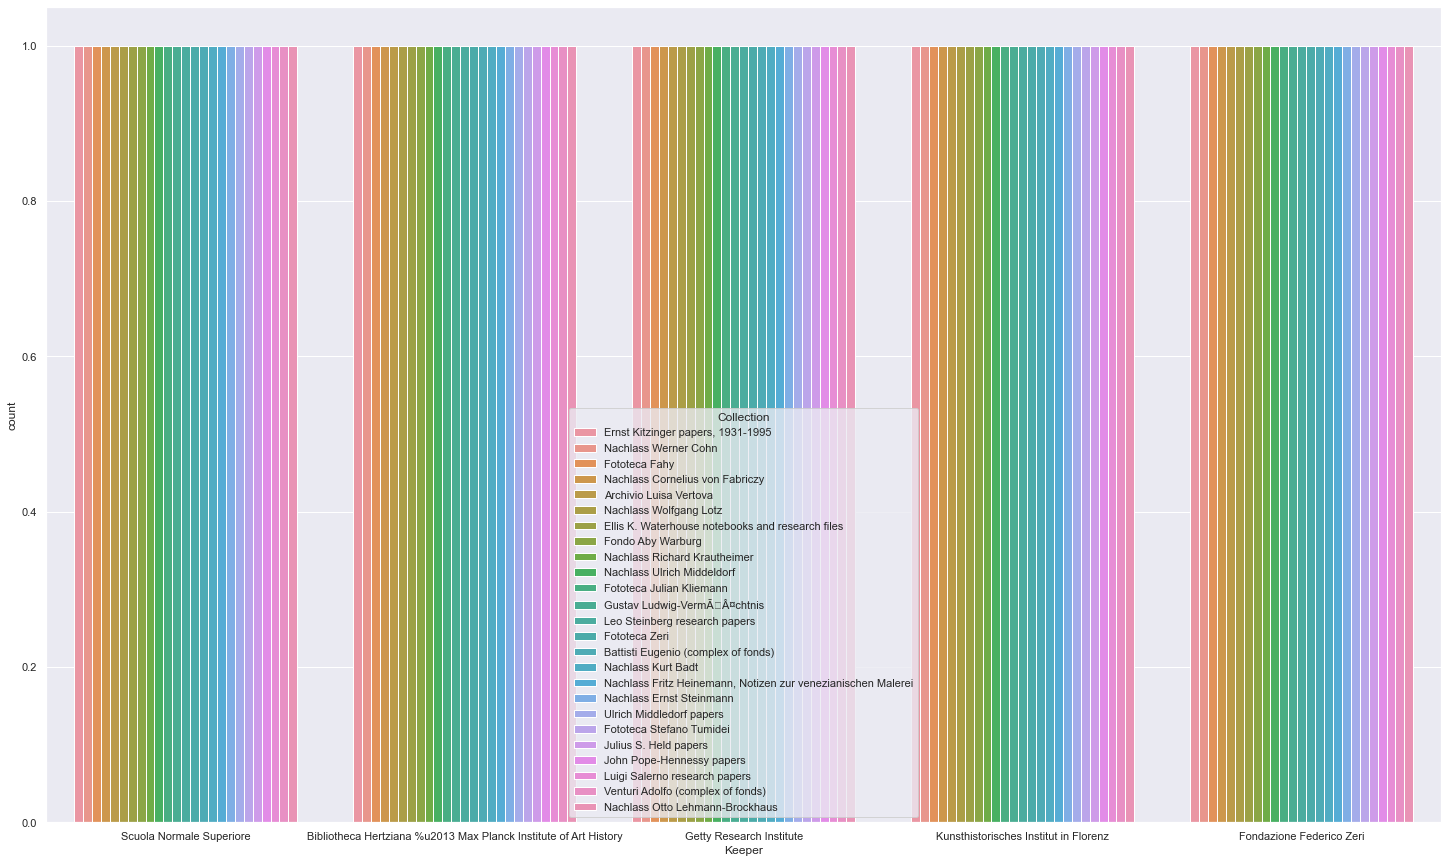

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (25, 15)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="Keeper", hue="Collection", data=df)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


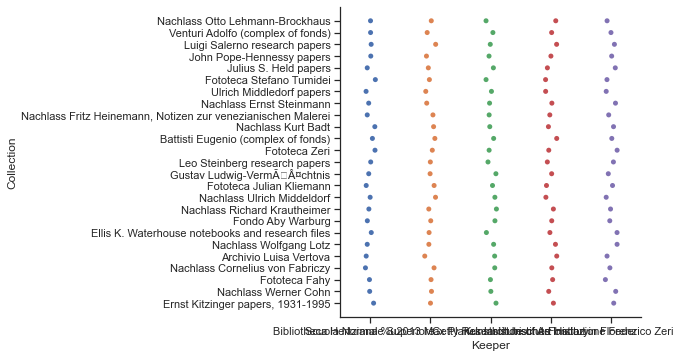

In [30]:

import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme(style="ticks")

g = sns.catplot(x="Keeper", y="Collection", data=df)



# 


In [31]:

import csv
from collections import defaultdict
import numpy as np
data = {} # final data
with open('collection_keeper_periods_without_dupes.csv') as csvfile:
    historians = [] 
    periods = []
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[0] not in historians:
            historians.append(row[0]) # create the list of unique periods
        if row[1] not in periods:
            periods.append(row[1]) # create the list of unique periods
    print(historians)
    print(periods)
    periods.sort()
    periods_zeros_matrix = np.array(np.zeros(( len(periods), len(historians) ))) # rows, columns
    
    for i, histo in enumerate(historians): # loop over periods and their index position  
        for j, period in enumerate(periods):
            with open('collection_keeper_periods_without_dupes.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[1] == period and row[0] == histo:  
                        periods_zeros_matrix[j][i] = int(periods_zeros_matrix[j][i])+1
    
    periods_zeros_matrix
    
# put everything together
data["Historians"] = historians
for i, period in enumerate(periods):
    data[period] = list(periods_zeros_matrix[i])
print(data)

['Ernst Kitzinger papers, 1931-1995', 'Nachlass Werner Cohn', 'Fototeca Fahy', 'Nachlass Cornelius von Fabriczy', 'Archivio Luisa Vertova', 'Nachlass Wolfgang Lotz', 'Ellis K. Waterhouse notebooks and research files', 'Fondo Aby Warburg', 'Nachlass Richard Krautheimer', 'Nachlass Ulrich Middeldorf', 'Fototeca Julian Kliemann', 'Gustav Ludwig-VermÃ¤chtnis', 'Leo Steinberg research papers', 'Fototeca Zeri', 'Battisti Eugenio (complex of fonds)', 'Nachlass Kurt Badt', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei', 'Nachlass Ernst Steinmann', 'Ulrich Middledorf papers', 'Fototeca Stefano Tumidei', 'Julius S. Held papers', 'John Pope-Hennessy papers', 'Luigi Salerno research papers', 'Venturi Adolfo (complex of fonds)', 'Nachlass Otto Lehmann-Brockhaus']
['Scuola Normale Superiore', 'Bibliotheca Hertziana %u2013 Max Planck Institute of Art History', 'Getty Research Institute', 'Kunsthistorisches Institut in Florenz', 'Fondazione Federico Zeri']
{'Historians': ['Ernst Kitzin

In [32]:
#VINE SEMPRE LA STESSA VISUALIZZAZIONE CON NUMERI UGUALI, LE BARRE SONO UGUALI IN OGNI GRUPPO
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
import random

output_file("bar_nested_colormapped_coll_keep.html")

periods = ['Battisti Eugenio (complex of fonds)', 'Julius S. Held papers', 'Leo Steinberg research papers', 'Nachlass Otto Lehmann-Brockhaus', 'Nachlass Cornelius von Fabriczy', 'Fototeca Stefano Tumidei', 'Fototeca Fahy', 'John Pope-Hennessy papers', 'Ellis K. Waterhouse notebooks and research files', 'Gustav Ludwig-Vermächtnis', 'Nachlass Werner Cohn', 'Nachlass Ulrich Middeldorf', 'Nachlass Wolfgang Lotz', 'Fototeca Zeri', 'Fondo Aby Warburg', 'Fototeca Julian Kliemann', 'Nachlass Richard Krautheimer', 'Nachlass Ernst Steinmann', 'Nachlass Kurt Badt', 'Venturi Adolfo (complex of fonds)', 'Ulrich Middledorf papers', 'Luigi Salerno research papers', 'Archivio Luisa Vertova', 'Ernst Kitzinger papers, 1931-1995', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei']
historians = ['Getty Research Institute', 'Scuola Normale Superiore', 'Kunsthistorisches Institut in Florenz', 'Bibliotheca Hertziana %u2013 Max Planck Institute of Art History', 'Fondazione Federico Zeri']
data = {'Historians': ['Ernst Kitzinger papers, 1931-1995', 'Nachlass Werner Cohn', 'Fototeca Fahy', 'Nachlass Cornelius von Fabriczy', 'Archivio Luisa Vertova', 'Nachlass Wolfgang Lotz', 'Ellis K. Waterhouse notebooks and research files', 'Fondo Aby Warburg', 'Nachlass Richard Krautheimer', 'Nachlass Ulrich Middeldorf', 'Fototeca Julian Kliemann', 'Gustav Ludwig-VermÃ¤chtnis', 'Leo Steinberg research papers', 'Fototeca Zeri', 'Battisti Eugenio (complex of fonds)', 'Nachlass Kurt Badt', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei', 'Nachlass Ernst Steinmann', 'Ulrich Middledorf papers', 'Fototeca Stefano Tumidei', 'Julius S. Held papers', 'John Pope-Hennessy papers', 'Luigi Salerno research papers', 'Venturi Adolfo (complex of fonds)', 'Nachlass Otto Lehmann-Brockhaus'], 'Bibliotheca Hertziana %u2013 Max Planck Institute of Art History': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'Fondazione Federico Zeri': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'Getty Research Institute': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'Kunsthistorisches Institut in Florenz': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'Scuola Normale Superiore': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}
number_of_colors = 40 # pick random colors for the countries
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (historian, period) for historian in historians for period in periods ]
counts = sum(zip(data['Getty Research Institute'], data['Scuola Normale Superiore'], data['Kunsthistorisches Institut in Florenz'], data['Bibliotheca Hertziana %u2013 Max Planck Institute of Art History'], data['Fondazione Federico Zeri']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=650, width=7000, title="Collection Counts by Keeper",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=periods, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1.55
p.xgrid.grid_line_color = None

show(p)